## Scorch: 4x Mouse brains (10x Genomics)
---

Scanpy preprocessing recipe followed by Harmony integration and UMAP dimensional reduction. I downloaded some mouse brain tissue from four separate brains from [10x Genomics](https://support.10xgenomics.com/single-cell-gene-expression/datasets).

* [Brain 1](https://support.10xgenomics.com/single-cell-gene-expression/datasets/6.0.0/SC3_v3_NextGem_DI_CellPlex_Neurons_30K_Brain_1). 

* [Brain 2](https://support.10xgenomics.com/single-cell-gene-expression/datasets/6.0.0/SC3_v3_NextGem_DI_CellPlex_Neurons_30K_Brain_2). 

* [Brain 3](https://support.10xgenomics.com/single-cell-gene-expression/datasets/6.0.0/SC3_v3_NextGem_DI_CellPlex_Neurons_30K_Brain_3). 

* [Brain 4](https://support.10xgenomics.com/single-cell-gene-expression/datasets/6.0.0/SC3_v3_NextGem_DI_CellPlex_Neurons_30K_Brain_4). 

The sample name should be placed in the beginning of the file basename:

```
/path/to/sample-1_file.h5
/path/to/sample-2_file.h5
/path/to/sample-3_file.h5
```

***Note***: I had to change the working version of Numba, which is currently incompatible with the umap module of *Scanpy*. I used the following: 
```
! pip install numba==0.50.1 --no-cache-dir
```

#### Import Scorch class, load data

In [1]:
%load_ext nb_black

from vintools.single_cell import Scorch

scorch = Scorch()

data_dir = "./neurons_h5_files/*.h5"
scorch.read_plural_10x_h5(data_dir)

Harmony version: 0.1.6
Scanpy version: 1.8.1



Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<IPython.core.display.Javascript object>

#### Scanpy preprocessing

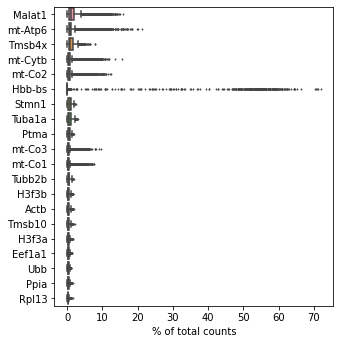

... storing 'feature_types' as categorical
... storing 'genome' as categorical


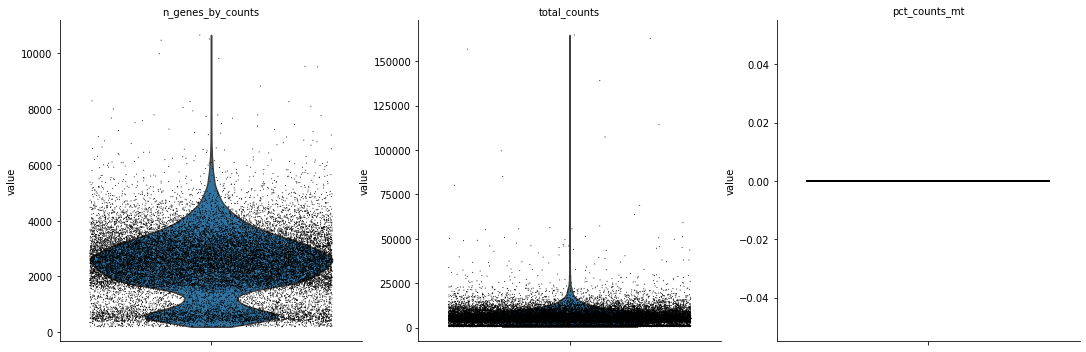

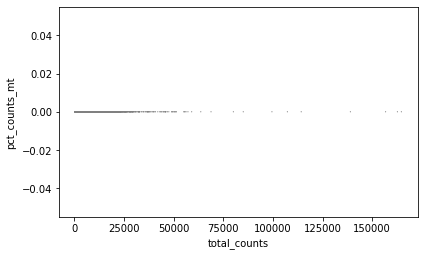

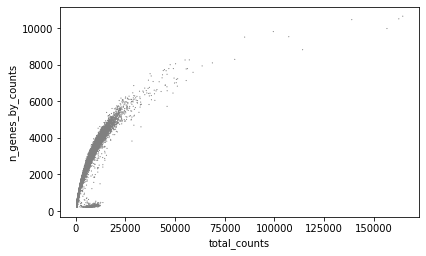

<IPython.core.display.Javascript object>

In [2]:
scorch.scanpy_qc()

Running scanpy normalization against counts total...
Running scanpy log normalization...
Identifying highly variable genes...


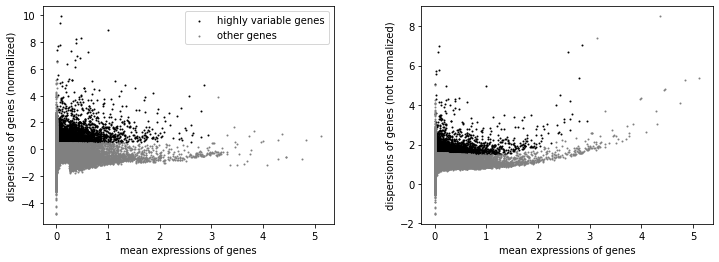

Scaling gene expression...


<IPython.core.display.Javascript object>

In [3]:
scorch.scanpy_counts_analysis()

Running Scanpy PCA...
Running Scanpy UMAP...
Performing Leiden clustering (resolution=1)...
Performing Louvain clustering (resolution=1)...


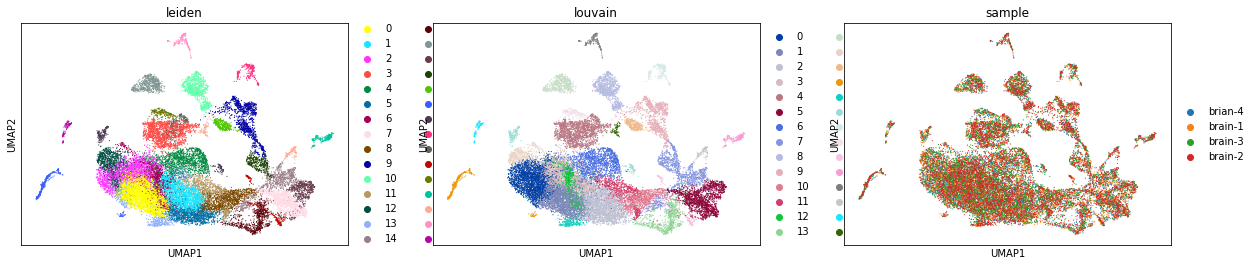

<IPython.core.display.Javascript object>

In [4]:
scorch.scanpy_dimensional_reduction_clustering()

#### Harmonize with Harmony, UMAP dimensional reduction

In [5]:
scorch.harmonize()

running harmony on adata.obsm['X_pca']; shape: (22952, 50)
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
Reach convergence after 5 iteration(s).


<IPython.core.display.Javascript object>

In [6]:
scorch.umap()

Calculating umap embedding...


<IPython.core.display.Javascript object>

#### Visualize results

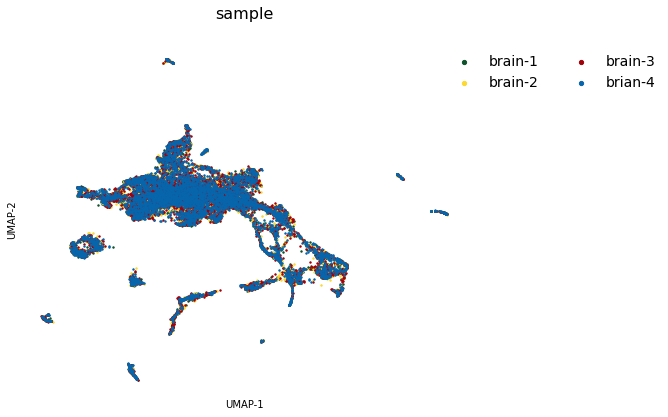

<IPython.core.display.Javascript object>

In [7]:
scorch.visualize(plot_by="sample", separate_colors=True)

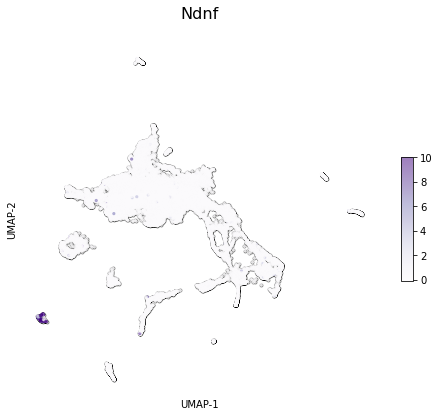

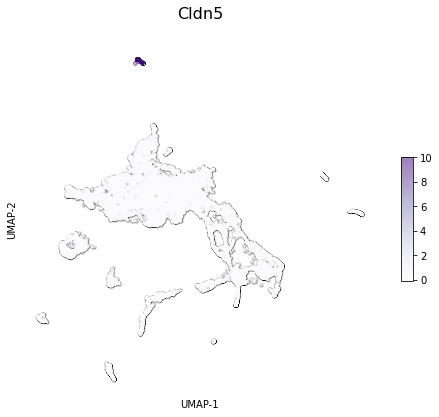

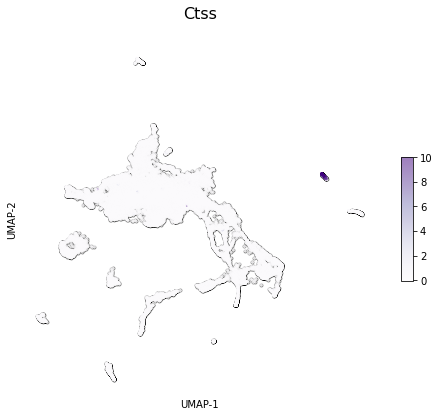

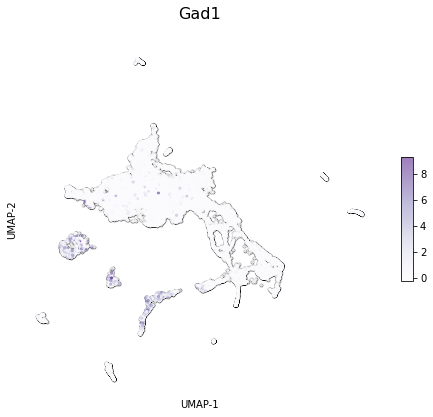

<IPython.core.display.Javascript object>

In [8]:
viz_genes = ["Ndnf", "Cldn5", "Ctss", "Gad1"]

for gene in viz_genes:
    scorch.visualize(plot_by=gene)

#### Adjust clustering and re-visualize

Performing Leiden clustering at resolution 0.2...
Performing Louvain clustering at resolution 0.2...
Previous resolution: 1.0
Adjusted resolution: 0.2


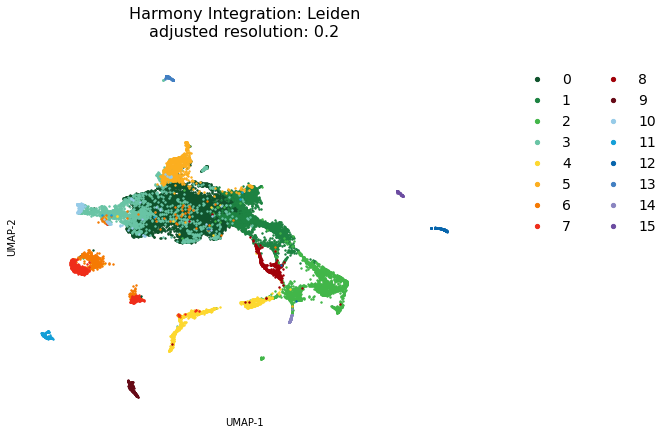

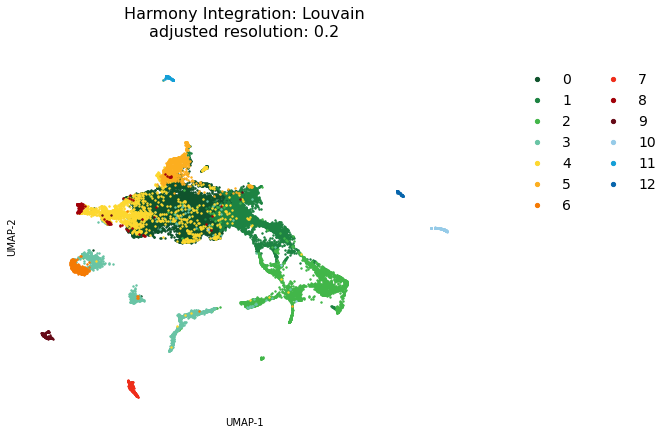

<IPython.core.display.Javascript object>

In [9]:
scorch.adjust_clustering_resolution(desired_resolution=0.2)

... storing 'leiden' as categorical


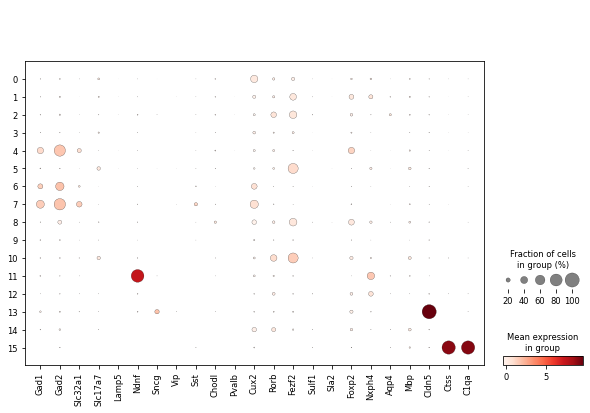

<IPython.core.display.Javascript object>

In [10]:
hippocampus_marker_genes = [
    "Gad1",
    "Gad2",
    "Slc32a1",
    "Slc17a7",
    "Lamp5",
    "Ndnf",
    "Sncg",
    "Vip",
    "Sst",
    "Chodl",
    "Pvalb",
    "Cux2",
    "Rorb",
    "Fezf2",
    "Sulf1",
    "Sla2",
    "Foxp2",
    "Nxph4",
    "Aqp4",
    "Mbp",
    "Cldn5",
    "Ctss",
    "C1qa",
]

scorch.cluster_dotplot(marker_genes=hippocampus_marker_genes)

In [11]:
scorch.check_time()

2.32 mins.


<IPython.core.display.Javascript object>